# Correlating C02 Emissions and Global Temperature Anomalies

## Define variables and create dataframes

In [ ]:
import plotly.express as px
import pandas as pd
import plotly.graph_objects as go

start_year = 1850
end_year = 2021
coefficient_of_correlation=0

# Emissions filtering
EMISSIONS_DATA = 'https://raw.githubusercontent.com/plotly/Figure-Friday/'\
        'refs/heads/main/2025/week-21/global.1751_2021.csv'
df_emission = pd.read_csv(EMISSIONS_DATA,encoding='utf8')
EMISSION_COL_NAME = 'Total carbon emissions from fossil fuel consumption and cement production (million metric tons of C)'
# filter emission data to use between 1850 and 2021
df_filtered_carbon_emissions_1850_2021 = df_emission[(df_emission['Year'] >= start_year) & (df_emission['Year'] <= end_year)]
EMISSION_TITLE='Total carbon emissions from fossil fuel<br>consumption and cement production (million metric tons of C)'

# Temp Anomalies Filtering
TEMP_ANOMALIES_DATA = '../data/global_temp_anomaly.csv'
df_temp_anomaly = pd.read_csv(TEMP_ANOMALIES_DATA,comment='#',encoding='utf8')
ANOMALY_COL_NAME = 'Anomaly'
df_filtererd_temp_anomalies_1850_2021 = df_temp_anomaly[(df_temp_anomaly['Year'] >= start_year) & (df_temp_anomaly['Year'] <= end_year)]
TEMP_ANOMALIES_TITLE = '' # wait until coeeficient of correlation is calculated


## Sankey Graph Visualizes Increasing amount of C02 Emmissions over the years
Data is available between 1751 and 2021.  
- 10 year gaps between 1955 and 2015
- 6 year gap between 1015 and 2021


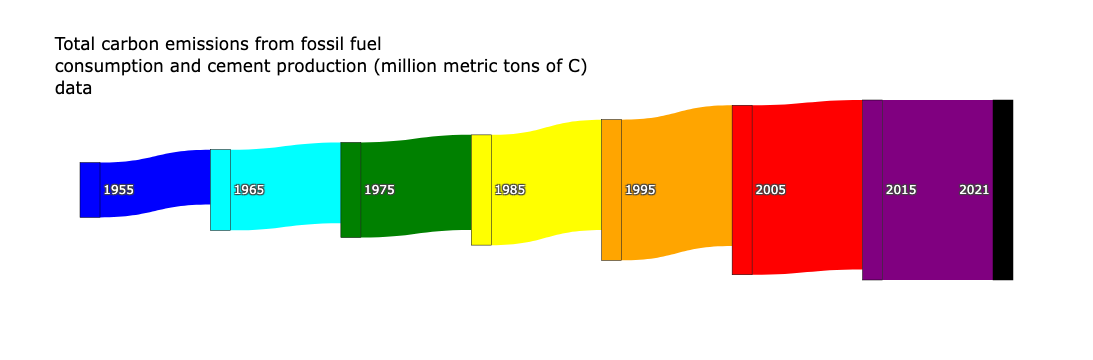

In [57]:
# SANKEY CHART: Total Emissions by Year
# Report 5 10 year gaps and 1 6 year gap of emissions beginning in 1955 and ending in 2021

# years to report data
selected_data_years_list = [1965, 1975, 1985, 1995, 2005, 2015, 2021]
# get total emissions for each year 
emissions = df_emission[df_emission['Year'].isin(selected_data_years_list)][EMISSION_COL_NAME].tolist()

# get Sankey node labels base on source and target
# source flows into target using staggered years
data = {
    'source': [0, 1, 2, 3, 4, 5, 6],
    'target': [1, 2, 3, 4, 5, 6, 7],
    'value': emissions,
    'source_label': ['1955', '1965', '1975', '1985', '1995', '2005', '2015'],
    'target_label': ['1965', '1975', '1985', '1995', '2005', '2015', '2021'],
}
df = pd.DataFrame(data)

# Create labels from source and target
# consolidate source and target labels into a single list
labels = list(pd.unique(df[['source_label', 'target_label']].values.ravel()))
link_colors = ['blue','aqua','green','yellow','orange','red','purple']

# Carbon Emissions from Gas
# snap arrangement when exact locations are not specified for Sankey

fig = go.Figure(data=[go.Sankey(
    arrangement='snap',
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=labels,
    ),
    link=dict(
        source=df['source'],
        target=df['target'],
        value=df['value'],
        color=link_colors
    )
)])
    
EMISSIONS_TITLE_TEXT = f"{EMISSION_TITLE}<br><a href='https://raw.githubusercontent.com/plotly/Figure-Friday/refs/heads/main/2025/week-21/global.1751_2021.csv' target='_blank'>data</a>"
sankey_fig.update_layout(
        hoverlabel=dict(
            font=dict(
                  size=14,
                  color="white"
              ),
            bgcolor="black",  # Example: white background
            font_size=16,      # Example: font size 16
            font_family="Rockwell", # Example: Rockwell font
        ),
            title_font_color="black",
            title_text=EMISSIONS_TITLE_TEXT
    )


sankey_fig.update_layout(
    font_color="white",
    title_font_color="black",
        title_text=f"{EMISSION_TITLE}<br><a href='https://raw.githubusercontent.com/plotly/Figure-Friday/refs/heads/main/2025/week-21/global.1751_2021.csv' target='_blank'>data</a>")
sankey_fig.show()

## Bar chart showing temperature anomalies by range of years

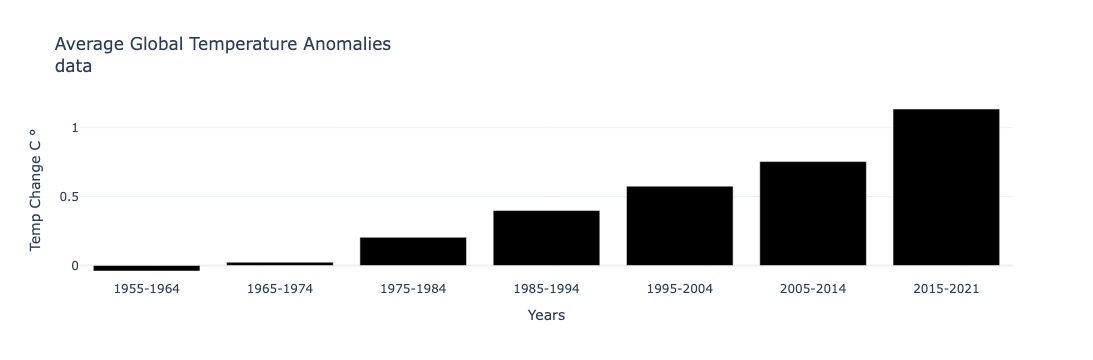

In [59]:
# BAR CHART: Temperature Anomalies by Year

def avg_net_temp_anomaly (df, year):
    '''
    Get average temperature anomoly based on year
    Years before 2015 look at averages between start year 
    (included) and start year + 9. The year 2015 only looks 
    at start year and start year + 6 temperatures up through 2021.
    '''
    start_year = int(year)
    # only have data up to 2021
    if start_year == 2015:
        end_year = 2021
    else:
        # most amounts are 9 year spread
        end_year = start_year + 9

    filtered_df = df[(df["Year"] >= start_year) & (df["Year"] <= end_year)]
    average = filtered_df["Anomaly"].sum()/6 if start_year == 2015 else filtered_df["Anomaly"].sum()/9
    return average
    
temp_anomalies_averages = []
anomaly_years = [ 1955, 1965, 1975, 1985,1995,2005,2015]

for year in anomaly_years:
    total = avg_net_temp_anomaly(df_temp_anomaly,year)
    temp_anomalies_averages.append(total)

label_years = ['1955-1964', '1965-1974', '1975-1984','1985-1994','1995-2004','2005-2014','2015-2021']

# Create the bar chart
bar_fig = go.Figure(data=[
    go.Bar(x=label_years, y=temp_anomalies_averages, marker_color='black')
])

# Update layout (optional)
bar_fig.update_layout(
    title='Average Global Temperature Anomalies<br><a href="https://raw.githubusercontent.com/rebeccapeltz/emissions/refs/heads/main/global-temp-anomaly-data.csv" target="_blank">data</a>',
    xaxis_title='Years',
    yaxis_title='Temp Change C &#176;',
    template='plotly_white',
    xaxis=dict(tickformat='%Y', tickvals=label_years)
)


bar_fig = get_global_temp_anomalies()
bar_fig.show()


## Correlation of Increasing C02 Emissions and Temperature Anomalies

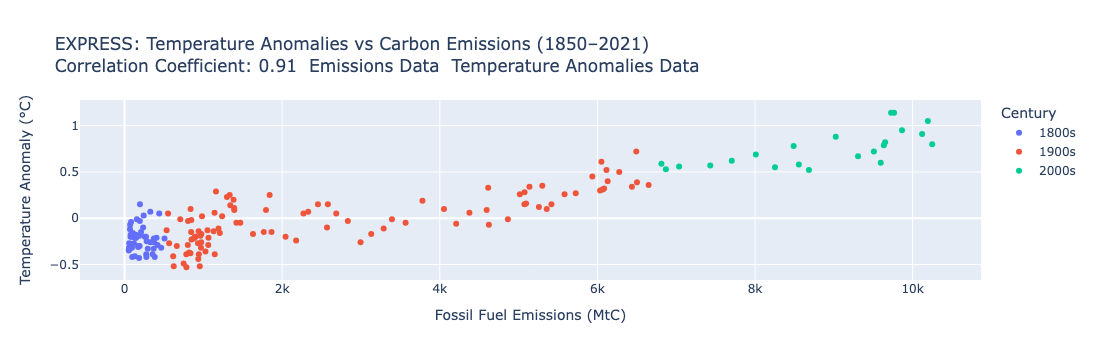

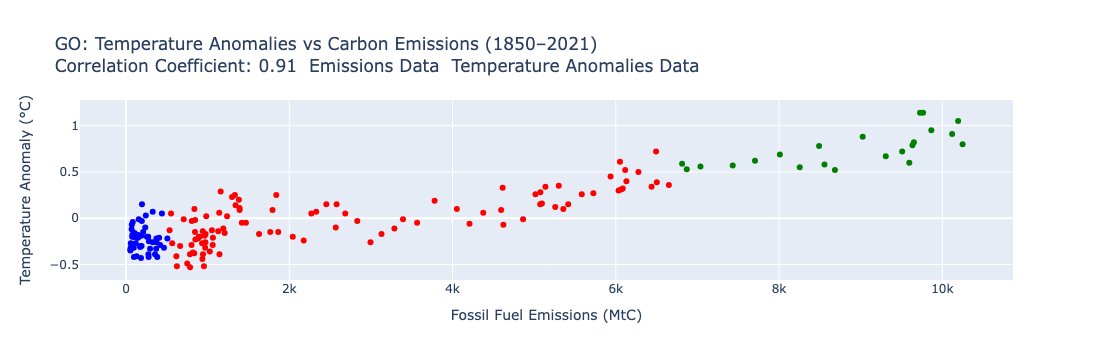

In [82]:
# Scatterpolot and CORRELATION: Do temperature anomalies increase with increased C02 emissions

# Merge both DataFrames on 'Year'
df_merged = pd.merge(df_filtered_carbon_emissions_1850_2021, df_filtererd_temp_anomalies_1850_2021, on='Year')

# Get list of years from merged
df_years = df_merged[['Year']].copy()

# Add century to df merged
df_merged['Century'] = ((df_merged['Year'] // 100) * 100).astype(str) + 's'

# Get Correllation Coefficient
coefficient_of_correlation = df_filtered_carbon_emissions_1850_2021[EMISSION_COL_NAME].corr(df_filtererd_temp_anomalies_1850_2021[ANOMALY_COL_NAME])
TEMP_ANOMALIES_TITLE = 'Temperature Anomalies vs Carbon Emissions (1850–2021)'\
          f'<br>Correlation Coefficient: {coefficient_of_correlation:.2f}'\
          f'  <a href="{EMISSIONS_DATA}" target=_blank>Emissions Data</a>'\
          f'  <a href="{TEMP_ANOMALIES_DATA}" target=_blank>Temperature Anomalies Data</a>'

# Plot scatterplot

# Scatterplot using Express
scatterplot_x_fig = px.scatter(
    df_merged,
    x=EMISSION_COL_NAME,
    y=ANOMALY_COL_NAME,
    color='Century', 
    labels={
        EMISSION_COL_NAME: 'Fossil Fuel Emissions (MtC)',
        ANOMALY_COL_NAME: 'Temperature Anomaly (°C)'
    },
    title= 'EXPRESS: ' + TEMP_ANOMALIES_TITLE
)
scatterplot_x_fig.show()


# Scatterplot using Graph Objects
centuries = df_merged['Century'].unique()
colors = ['blue','red','green']  # Choose your own colors

# Create a dictionary mapping categories to colors
color_map = dict(zip(centuries, colors))

scatterplot_go_fig = go.Figure(data=[go.Scatter(
    x=df_merged[EMISSION_COL_NAME],
    y=df_merged[ANOMALY_COL_NAME],
    mode='markers',
    marker=dict(
        color=df_merged['Century'].map(color_map), # Use the mapping
        size=6
    )
)])
# Customize layout (optional)
scatterplot_go_fig.update_layout(
    title='GO: ' + TEMP_ANOMALIES_TITLE,
    xaxis_title='Fossil Fuel Emissions (MtC)',
    yaxis_title='Temperature Anomaly (°C)'
)

scatterplot_go_fig.show()


## Show All Three Graphs: Sankey, Bar, Scatterplot

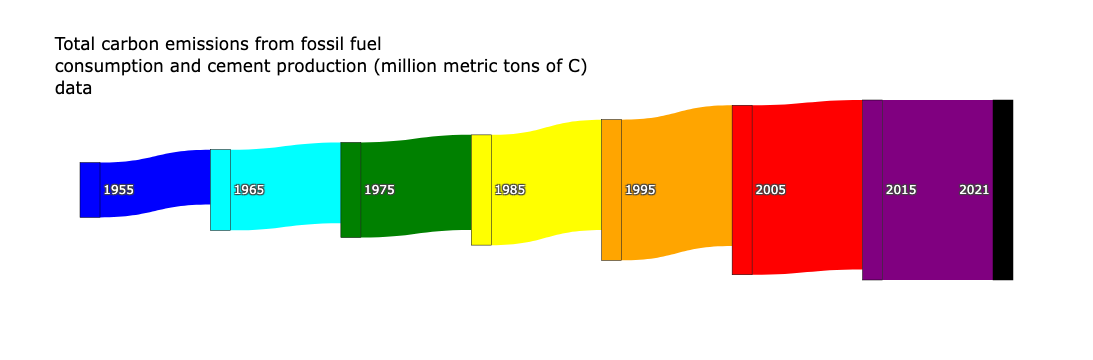

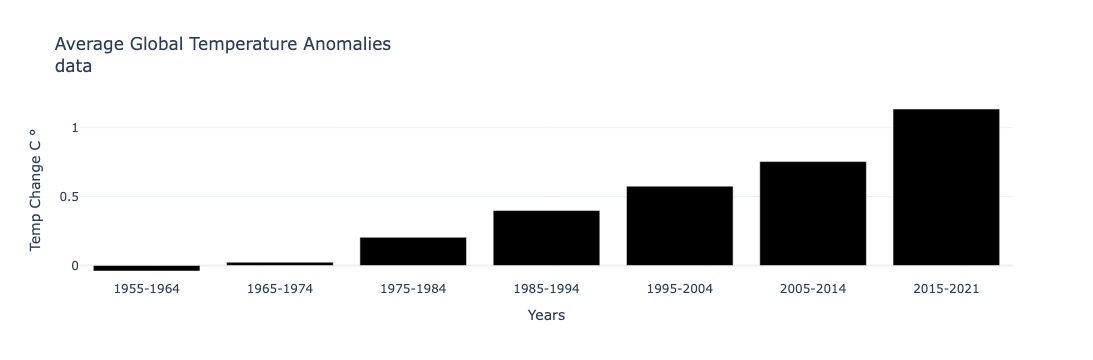

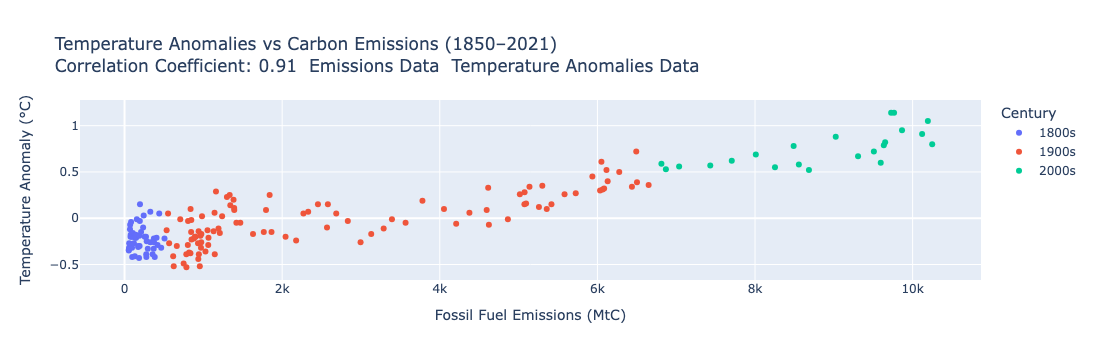

In [55]:

sankey_fig.show()

bar_fig.show()

scatterplot_fig.show()

